Variant: Malysh Igor Igorevich

at this test, I used LLM model as an assistant, not as the main author of the analysis.
Specifically:

I asked for code snippets for standard statistical tests.

I requested recommendations for formatting graphs and Markdown comments so that the notebook is consistent.

All data loading, writing code, execution of code, interpretation of results, and final conclusions were done by me,
based on the dataset and the course requirements.


LLM was used as a support tool for:

Speed up the search for Python libraries,

Speeding up the writing of small pieces of code,

checking the correctness of statistical methods

formatting comments using Markdown, where is it required

Therefore, LLM was not the author of the work, but a helper for coding and structuring. The analysis, choice of variables, and interpretation remain my own.



Used LLMs: https://chatgpt.com/

Evaluation of the effectiveness of application: in all use-cases, the used models showed acceptable results


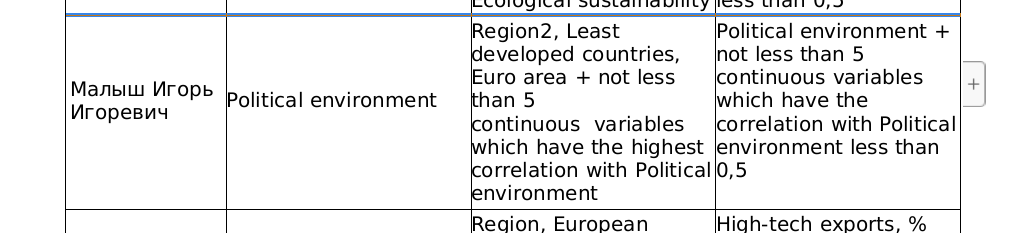

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import warnings
warnings.filterwarnings("ignore")


df = pd.read_excel('WIPO-GII_2022.xlsx')


df.head()


,Country,Business environment_2022,Business sophistication index_2022,Citable documents H-index_2022,Creative goods and services_2022,"Creative goods exports, % total trade_2022",Creative outputs index_2022,"Cultural and creative services exports, % total trade_2022","Domestic market scale, bn PPP$_2022",Ecological sustainability_2022,...,"Tertiary enrolment, % gross_2022",University-industry R&D collaboration_2022,Region,Region2,Euro area,European Union,OECD members,Least developed countries,Income,High income
0,Cote d'Ivoire,48.3,21.8,5.1,1.2,0.3,6.0,2.1,3.4,23.7,...,4.0,38.5,Sub-Saharan Africa,Sub-Saharan Africa,0,0,0,0,middle income,0
1,Czechia,42.1,46.2,30.4,40.6,100.0,29.9,15.3,10.3,47.3,...,42.6,59.1,Europe & Central Asia,Europe,0,1,1,0,high income,1
2,"Egypt, Arab Rep.",45.0,20.4,18.0,9.1,16.9,14.1,0.0,30.9,25.4,...,24.1,47.0,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0
3,"Hong Kong SAR, China",69.7,46.7,38.4,47.4,100.0,53.2,3.0,10.8,56.3,...,55.6,62.9,East Asia & Pacific,Asia-Pacific,0,0,0,0,high income,1
4,"Iran, Islamic Rep.",13.3,18.6,22.1,4.0,1.2,31.8,4.2,26.6,14.7,...,37.5,27.7,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0


1.1.Do the descriptive analysis of all the variables which will be used in cluster analysis. Prove that the selected variables could be used simultaneously in one cluster model.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 55 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Country                                                                         139 non-null    object 
 1   Business environment_2022                                                       132 non-null    float64
 2   Business sophistication index_2022                                              132 non-null    float64
 3   Citable documents H-index_2022                                                  132 non-null    float64
 4   Creative goods and services_2022                                                132 non-null    float64
 5   Creative goods exports, % total trade_2022                                      132 non-null    float64
 6   Creative outputs i

In [64]:
# lets checkout missing vals (used code from homework) 

missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values
Business environment_2022,5.035971
Business sophistication index_2022,5.035971
Citable documents H-index_2022,5.035971
Creative goods and services_2022,5.035971
"Creative goods exports, % total trade_2022",5.035971
Creative outputs index_2022,5.035971
"Cultural and creative services exports, % total trade_2022",5.035971
"Domestic market scale, bn PPP$_2022",5.035971
Ecological sustainability_2022,5.035971
"Expenditure on education, % GDP_2022",5.035971


In [65]:
# lets use simplest data cleaning strategy - drop na vals

df = df.dropna()

missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values


In [66]:
predicted_var = 'Political environment_2022'
df[predicted_var]

0      53.3
1      76.1
2      49.0
3      83.7
4      36.9
       ... 
134    51.6
135    53.2
136    62.2
137    78.2
138    76.0
Name: Political environment_2022, Length: 132, dtype: float64

In [67]:
# lets present cols datatypes in convenient way

for t in df.dtypes.unique():
    print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: object
['Country' 'Region' 'Region2' 'Income']

Type: float64
['Business environment_2022' 'Business sophistication index_2022'
 'Citable documents H-index_2022' 'Creative goods and services_2022'
 'Creative goods exports, % total trade_2022'
 'Creative outputs index_2022'
 'Cultural and creative services exports, % total trade_2022'
 'Domestic market scale, bn PPP$_2022' 'Ecological sustainability_2022'
 'Expenditure on education, % GDP_2022'
 'Firms offering formal training, %_2022' 'General infrastructure_2022'
 'Government effectiveness_2022' "Government's online service_2022"
 'Graduates in science and engineering, %_2022'
 'Gross expenditure on R&D, % GDP_2022'
 'High-tech exports, % total trade_2022'
 'High-tech imports, % total trade_2022' 'High-tech manufacturing, %_2022'
 'Human capital and research index_2022'
 'Information and Communications Technology access_2022'
 'Information and Communications Technology services exports, % total trade_2022'
 'Information and Comm

In [ ]:
# lets encode cat vars
# used llm to get code snippet for cat encoding


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_vars = ['Country', 'Region', 'Region2', 'Income']

df_cat = df.copy()
df_cat[cat_vars] = df_cat[cat_vars]


enc = OneHotEncoder(handle_unknown='ignore')

ct = ColumnTransformer([('ohe', enc, cat_vars)], remainder='passthrough')

# fit-transform
X_trans = ct.fit_transform(df_cat)

# get feature names for OHE part and keep remainder column names in original order
ohe_names = ct.named_transformers_['ohe'].get_feature_names_out(cat_vars).tolist()
remainder_cols = [c for c in df_cat.columns if c not in cat_vars]
feature_names = list(ohe_names) + remainder_cols

# build DataFrame (preserve index)
df_encoded = pd.DataFrame(X_trans, columns=feature_names, index=df_cat.index)

# convert passthrough numeric columns back to numeric dtype (optional)
for col in remainder_cols:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')




TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
# find out corr of continuous variables with each other (including target var)


numeric_cols = df.select_dtypes(include=[np.number]).columns.to_numpy()

df[numeric_cols].corr()

,Business environment_2022,Business sophistication index_2022,Citable documents H-index_2022,Creative goods and services_2022,"Creative goods exports, % total trade_2022",Creative outputs index_2022,"Cultural and creative services exports, % total trade_2022","Domestic market scale, bn PPP$_2022",Ecological sustainability_2022,"Expenditure on education, % GDP_2022",...,Scientific and technical articles/bn PPP$ GDP_2022,"Software spending, % GDP_2022",Tertiary education_2022,"Tertiary enrolment, % gross_2022",University-industry R&D collaboration_2022,Euro area,European Union,OECD members,Least developed countries,High income
Business environment_2022,1.000000,0.523083,0.376547,0.400947,0.194081,0.430982,0.277058,0.191184,0.202476,0.137622,...,0.260680,0.369380,0.392087,0.273803,0.759305,0.153601,0.104429,0.315914,-0.198400,0.420853
Business sophistication index_2022,0.523083,1.000000,0.766317,0.743201,0.376012,0.858586,0.607467,0.395154,0.597735,0.275548,...,0.647180,0.659896,0.623607,0.635783,0.732716,0.449959,0.528001,0.710892,-0.460060,0.708961
Citable documents H-index_2022,0.376547,0.766317,1.000000,0.551333,0.329104,0.765391,0.377403,0.715857,0.376941,0.243212,...,0.561111,0.762910,0.470384,0.544010,0.615951,0.307628,0.356881,0.684447,-0.328444,0.579056
Creative goods and services_2022,0.400947,0.743201,0.551333,1.000000,0.498471,0.739334,0.621691,0.234104,0.666987,0.064915,...,0.493655,0.471895,0.494186,0.529711,0.544774,0.406702,0.481268,0.573388,-0.358986,0.591911
"Creative goods exports, % total trade_2022",0.194081,0.376012,0.329104,0.498471,1.000000,0.398163,0.049937,0.324551,0.281340,-0.058064,...,0.082226,0.249027,0.286782,0.235795,0.336466,0.065216,0.208062,0.276528,-0.241010,0.226999
Creative outputs index_2022,0.430982,0.858586,0.765391,0.739334,0.398163,1.000000,0.546834,0.473346,0.593174,0.258665,...,0.623824,0.712377,0.617212,0.656988,0.630172,0.435419,0.497772,0.643635,-0.481090,0.631173
"Cultural and creative services exports, % total trade_2022",0.277058,0.607467,0.377403,0.621691,0.049937,0.546834,1.000000,0.121398,0.481340,0.103261,...,0.395876,0.290821,0.383714,0.371815,0.349632,0.377265,0.457454,0.348603,-0.232066,0.441740
"Domestic market scale, bn PPP$_2022",0.191184,0.395154,0.715857,0.234104,0.324551,0.473346,0.121398,1.000000,0.022262,0.022972,...,0.083774,0.471680,0.201322,0.259086,0.367620,0.055506,0.034314,0.300434,-0.238370,0.198435
Ecological sustainability_2022,0.202476,0.597735,0.376941,0.666987,0.281340,0.593174,0.481340,0.022262,1.000000,0.022281,...,0.512541,0.418833,0.489220,0.525967,0.349991,0.531334,0.652092,0.518552,-0.397679,0.547776
"Expenditure on education, % GDP_2022",0.137622,0.275548,0.243212,0.064915,-0.058064,0.258665,0.103261,0.022972,0.022281,1.000000,...,0.358656,0.265416,0.192512,0.296105,0.192742,0.088231,0.135595,0.292063,-0.277699,0.255538


In [ ]:
corr_with_target = df[numeric_cols].corr()[predicted_var].abs().sort_values(ascending=False)
corr_with_target = corr_with_target.drop(labels=[predicted_var], errors='ignore').dropna()
corr_with_target

Government effectiveness_2022                                                     0.976950
Political and operational stability_2022                                          0.954470
Infrastructure index_2022                                                         0.827178
Business sophistication index_2022                                                0.809181
Information and Communications Technology use_2022                                0.787894
Human capital and research index_2022                                             0.787665
Logistics performance_2022                                                        0.772078
PISA scales in reading, maths and science_2022                                    0.768141
Online creativity_2022                                                            0.749619
High income                                                                       0.741099
Knowledge workers_2022                                                            0.740601

In [ ]:
variables_specified_in_task = ['Region2', 'Least developed countries', 'Euro area']

selected_continuous_variables = ['Government effectiveness_2022', ] 


In [ ]:
# lets check corr between all used variables and 
# we will make sure that there is no significant correlation between them 
# (except for the one we predict)
 


df[variables_specified_in_task+selected_continuous_variables].corr()

ValueError: could not convert string to float: 'Sub-Saharan Africa'